# Problem Set 4

## CED18I039 - Paleti Krishnasai

## QUESTION 1
**Select a subset of relevant attributes from the given dataset that are necessary to know about the
total volume of avocados with product lookup codes (PLU) 4046, 4225, 4770) which are of organic
type. (Use AVOCADO dataset)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("Avocado Dataset.csv")
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#PLU codes and bag attributes affect total volume
Organic = Data.loc[Data['type']=="organic"] #To select only those tuples with 

Organic.reset_index(drop=True,inplace=True)
Organic.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
1,20-12-2015,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
2,13-12-2015,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
3,06-12-2015,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
4,29-11-2015,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany


In [4]:
#Take only the certain Attributes

Organic = Organic[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

Organic.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0
1,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0
2,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0
3,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0
4,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0


## QUESTION 2
**Discard all duplicate entries in the given dataset and fill all the missing values in the attribute
“AveragePrice” as 1.25. Also print the size of the dataset before and after removing duplicates. (Use
Trail dataset)**

In [5]:
Data = pd.read_csv("Trail.csv")

#Before Removing Duplicates
print("Size:-"+str(Data.shape[0])+" rows")

Data.head()

Size:-202 rows


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,NaN,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
4,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [6]:
Data = Data.drop_duplicates()

#After Removing Duplicates
print("Size:-"+str(Data.shape[0])+" rows")

Size:-195 rows


In [7]:
#To show number of missing data
Data.isnull().sum()

Date             0
AveragePrice    24
Total Volume     0
4046             0
4225             0
4770             0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64

In [8]:
#Fill Missing Values
Data['AveragePrice'].fillna(1.25,inplace=True)

#To show Missing Values are gone
Data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## QUESTION 3

**Binarize the attribute “Year”. Set the threshold above 2016 and print it without truncation. (Use
AVOCADO dataset)**

In [9]:
Data = pd.read_csv("Avocado Dataset.csv")

Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
#Using 2016 as the threshold we binarise the "Year" ttribute

Data["year"] = (Data["year"] > 2016).astype(int)

Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,Albany


## QUESTION 4

**Transform all categorical attributes in the dataset AVOCADO using Integer Encoding.**

In [11]:
Data = pd.read_csv("Avocado Dataset.csv")
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
#Encode attributes type and region

Data['type'] = Data['type'].astype('category')
Data['type'] = Data['type'].cat.codes

Data['region'] = Data['region'].astype('category')
Data['region'] = Data['region'].cat.codes

Data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


## QUESTION 5
**Transform the attribute = “Region” in the given dataset AVOCADO using One-Hot Encoding.**


In [13]:
Data = pd.read_csv("Avocado Dataset.csv")
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
#One Hot Encode in seperate data frame


OneHot = pd.get_dummies(Data.region,prefix="Region")
OneHot['region'] = Data['region']
OneHot.head()


,Region_Albany,Region_Atlanta,Region_BaltimoreWashington,Region_Boise,Region_Boston,Region_BuffaloRochester,Region_California,Region_Charlotte,Region_Chicago,Region_CincinnatiDayton,...,Region_SouthCentral,Region_Southeast,Region_Spokane,Region_StLouis,Region_Syracuse,Region_Tampa,Region_TotalUS,Region_West,Region_WestTexNewMexico,region
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Albany
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Albany
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Albany
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Albany
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Albany


In [15]:
#Join Encoded Attribute to Main Data Frame
for reg in OneHot.columns:
    Data[reg]=OneHot[reg]

Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,Region_SouthCarolina,Region_SouthCentral,Region_Southeast,Region_Spokane,Region_StLouis,Region_Syracuse,Region_Tampa,Region_TotalUS,Region_West,Region_WestTexNewMexico
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0



## QUESTION 6
**Ignore the tuples that hold missing values and print the subset of data from AVOCADO dataset.**

In [16]:
Data = pd.read_csv("Avocado Dataset.csv")
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
#Numberof Missing Data Tuples
Data.isnull().sum()

Date             0
AveragePrice    28
Total Volume     0
4046             0
4225             0
4770             0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64

In [18]:
#Ignore tuples with missing data

Data.dropna(axis=0,how='any',inplace=True)

Data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## QUESTION 7
**Drop the attribute that has high nullity as it facilitates efficient prediction.**

In [19]:
Data = pd.read_csv("Avocado Dataset.csv")
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [20]:
Data.isnull().sum()

Date             0
AveragePrice    28
Total Volume     0
4046             0
4225             0
4770             0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64

In [21]:
#Drop Columns with missing data

Data.dropna(axis=1,how='any',inplace=True)

Data.isnull().sum()


Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## QUESTION 8
**Study the entire dataset and report the complete statistical summary about the data (Use AVOCADO
dataset)**

* Dimension of the dataset
* Most frequently occurring value under every attribute.
* Datatype of every attribute
* Count
* Mean
* Standard Deviation
* Minimum Value
* Maximum value
* 25% (Lower Quartile)
* Median i.e. 50%
* 75% (Upper Quartile)
* Find whether the class distribution of dataset is imbalanced. (Note: Fix the class label as "Type” in the given dataset)
* Correlation matrix
* Skewness of every attribute.

In [22]:
Data = pd.read_csv("Avocado Dataset.csv")
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [23]:
# Dimensions
Data.shape

(18250, 13)

In [24]:
# Most frequently occurring value under every attribute

for attr in Data.columns:
    print(attr+ "= " + str(Data[attr].mode()[0]))




Date= 18-03-2018
AveragePrice= 1.15
Total Volume= 2038.99
4046= 0.0
4225= 0.0
4770= 0.0
Total Bags= 0.0
Small Bags= 0.0
Large Bags= 0.0
XLarge Bags= 0.0
type= conventional
year= 2017
region= Albany


In [25]:
# Count
Data.apply(pd.Series.value_counts)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,NaN,NaN,NaN,242.0,61.0,5498.0,15.0,159.0,2370.0,12049.0,NaN,NaN,NaN
0.83,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,8.0,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1.01,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336.0
conventional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126.0,NaN,NaN
na,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nil,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Mean
Data.mean()

Total Volume    850598.273413
4046            292992.481896
4225            295138.477670
4770             22838.484500
Total Bags      239626.747390
Small Bags      182185.367250
Large Bags       54335.123135
XLarge Bags       3106.256292
year              2016.148000
dtype: float64

In [27]:
#Standard Deviation
Data.std()

Total Volume    3.453456e+06
4046            1.264956e+06
4225            1.204089e+06
4770            1.074613e+05
Total Bags      9.862168e+05
Small Bags      7.461591e+05
Large Bags      2.439596e+05
XLarge Bags     1.769242e+04
year            9.400127e-01
dtype: float64

In [28]:
#Minimum
Data.min()

Date              01-01-2017
Total Volume           84.56
4046                     0.0
4225                     0.0
4770                     0.0
Total Bags               0.0
Small Bags               0.0
Large Bags               0.0
XLarge Bags              0.0
type            conventional
year                    2015
region                Albany
dtype: object

In [29]:
#Maximum
Data.max()

Date                  31-12-2017
Total Volume         62505646.52
4046                 22743616.17
4225                 20470572.61
4770                  2546439.11
Total Bags           19373134.37
Small Bags            13384586.8
Large Bags            5719096.61
XLarge Bags            551693.65
type                     organic
year                        2018
region          WestTexNewMexico
dtype: object

In [30]:
#25% (Lower Quartile)
# Median i.e. 50%
# 75% (Upper Quartile)

Quant = Data.quantile([0.25,0.5,0.75])
print("0.25 = LOWER QUARTILE , 0.5= MEDIAN , 0.75 =UPPER QUARTILE ")
Quant

0.25 = LOWER QUARTILE , 0.5= MEDIAN , 0.75 =UPPER QUARTILE 


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0.25,10839.6275,854.2100,3008.0975,0.000,5089.0825,2850.3225,127.580,0.0000,2015.0
0.50,107365.5050,8643.2000,29058.8750,184.975,39741.1800,26351.6150,2647.270,0.0000,2016.0
0.75,432952.6650,111008.7125,150166.3350,6242.055,110781.1150,83336.2100,22018.275,132.4325,2017.0


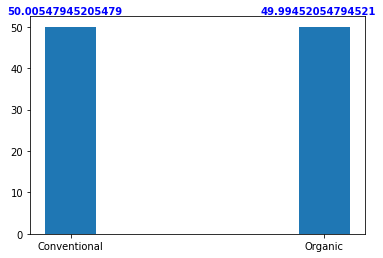

In [31]:
#If class is imbalanced or not

typ = Data.type.value_counts()
typ = typ/typ.sum() * 100
x = ["Conventional","Organic"]

plt.bar( x, typ ,width=0.2)

for i, v in enumerate(typ):
    plt.text(i-0.25, v + 3,  str(v), color='blue', fontweight='bold')

plt.show()

In [32]:
# dataset is balanced

In [33]:
#Correlation Matrix

Data.corr()


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Total Volume,1.000000,0.977863,0.974181,0.872203,0.963047,0.967238,0.880640,0.747158,0.017165
4046,0.977863,1.000000,0.926110,0.833390,0.920057,0.925280,0.838645,0.699378,0.003328
4225,0.974181,0.926110,1.000000,0.887855,0.905788,0.916031,0.810016,0.688809,-0.009584
4770,0.872203,0.833390,0.887855,1.000000,0.792315,0.802733,0.698472,0.679862,-0.036550
Total Bags,0.963047,0.920057,0.905788,0.792315,1.000000,0.994335,0.943009,0.804233,0.071520
Small Bags,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063883
Large Bags,0.880640,0.838645,0.810016,0.698472,0.943009,0.902589,1.000000,0.710859,0.087858
XLarge Bags,0.747158,0.699378,0.688809,0.679862,0.804233,0.806845,0.710859,1.000000,0.081005
year,0.017165,0.003328,-0.009584,-0.036550,0.071520,0.063883,0.087858,0.081005,1.000000


In [34]:
#Skewness of each attribute

Data.skew()

Total Volume     9.007930
4046             8.648456
4225             8.942706
4770            10.159671
Total Bags       9.756334
Small Bags       9.540917
Large Bags       9.796719
XLarge Bags     13.140106
year             0.215371
dtype: float64

## QUESTION 9

The following dataset has been chosen from kaggle, and does not require and preprocessing for cleaning, encoding and imputation for the decision tree model. It is an already preprocessed dataset.

In [35]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
# Seperating target(dependent) from features(independent)
target = ['Outcome']
features = list(set(df.columns) - set(target))
features

['Age',
 'SkinThickness',
 'Pregnancies',
 'BMI',
 'Insulin',
 'Glucose',
 'DiabetesPedigreeFunction',
 'BloodPressure']

In [40]:
X = df[features]
y = df[target]

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Since we would be using different selection parameters while building the decision tree, we need to split the dataset into train and test datasets, to fit using the training set and evaluate the accuracy of the model using the test set.


In [42]:
## Splitting the dataset into train and test datasets, for the model to fit and predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:
#Using gini index for information gain

In [44]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3) 
model.fit(X_train,y_train) 
y_pred = model.predict(X_test) 

In [45]:
print(f'For gini index as selection parameter, the accuracy is {metrics.accuracy_score(y_test, y_pred)}')

For gini index as selection parameter, the accuracy is 0.7857142857142857


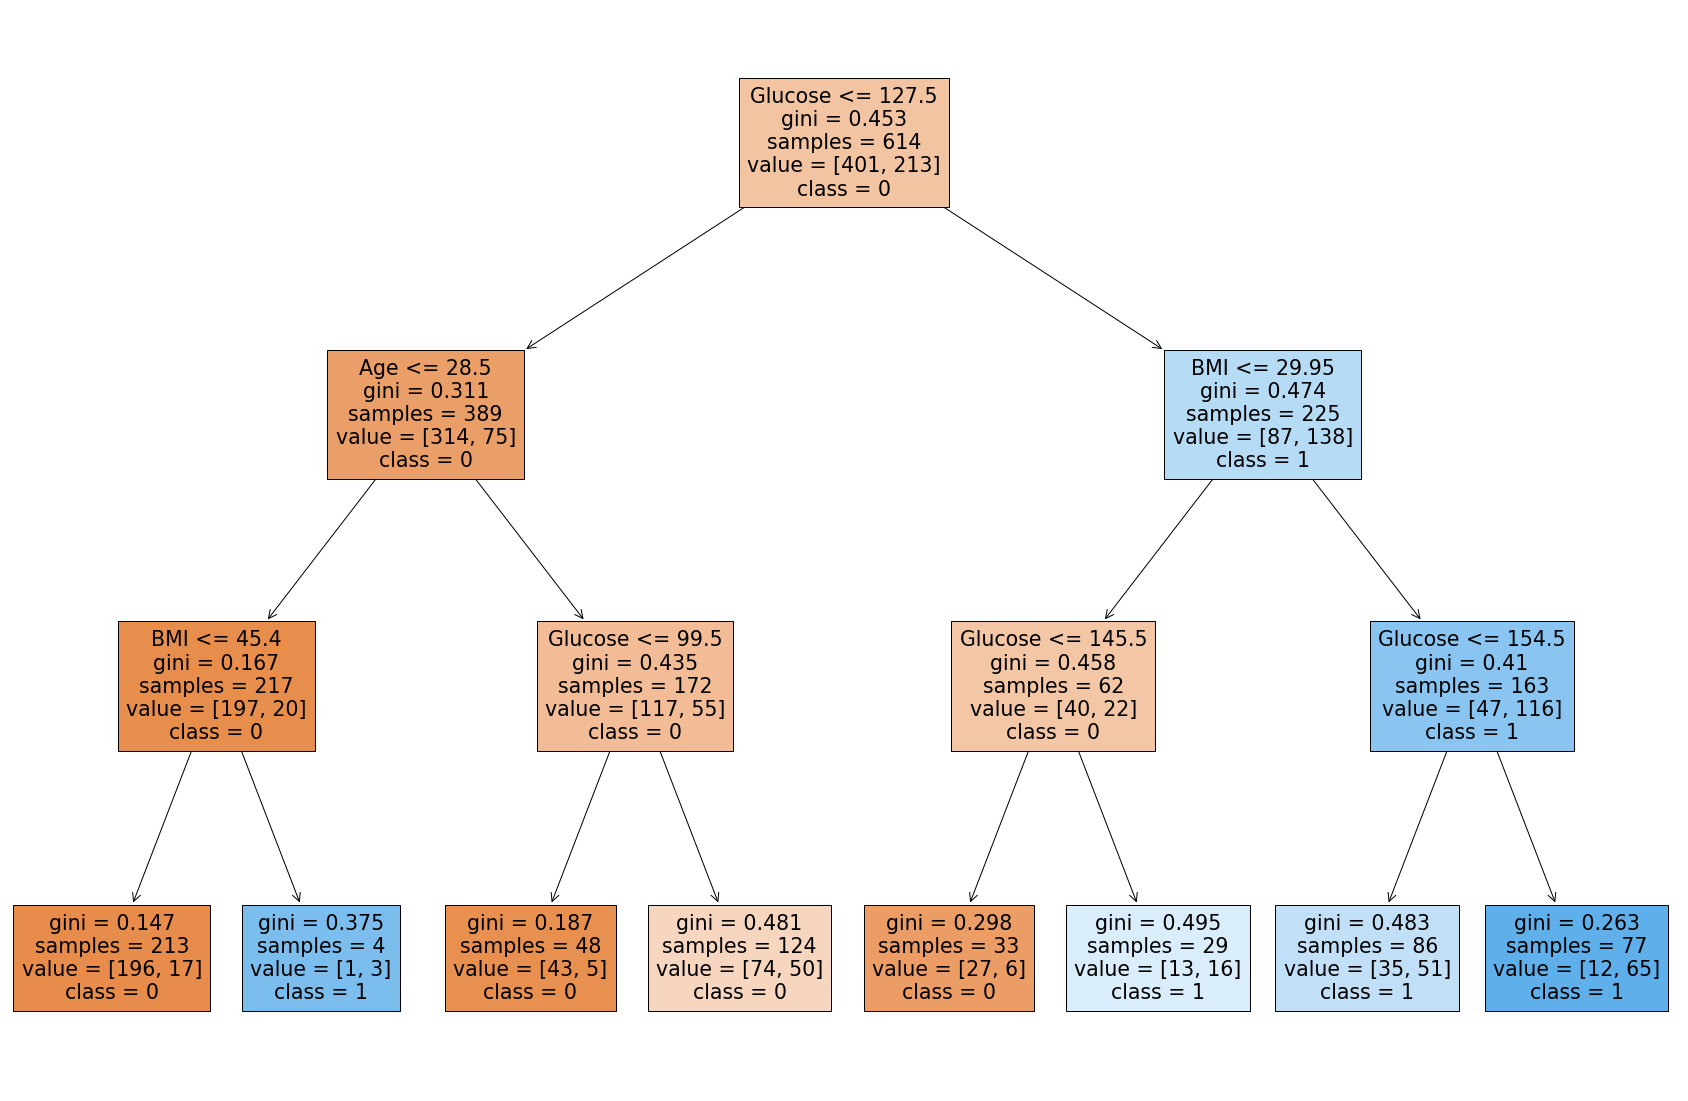

In [46]:
#printing the decision tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,20))
_ = plot_tree(model, feature_names=features,  class_names=['0','1'], filled=True)

In [47]:
#Using entropy for information gain
model = DecisionTreeClassifier(criterion="entropy", max_depth=3) 
model.fit(X_train,y_train) 
y_pred = model.predict(X_test) 

In [48]:
print(f'For entropy index as selection parameter, the accuracy is {metrics.accuracy_score(y_test, y_pred)}')

For entropy index as selection parameter, the accuracy is 0.7987012987012987


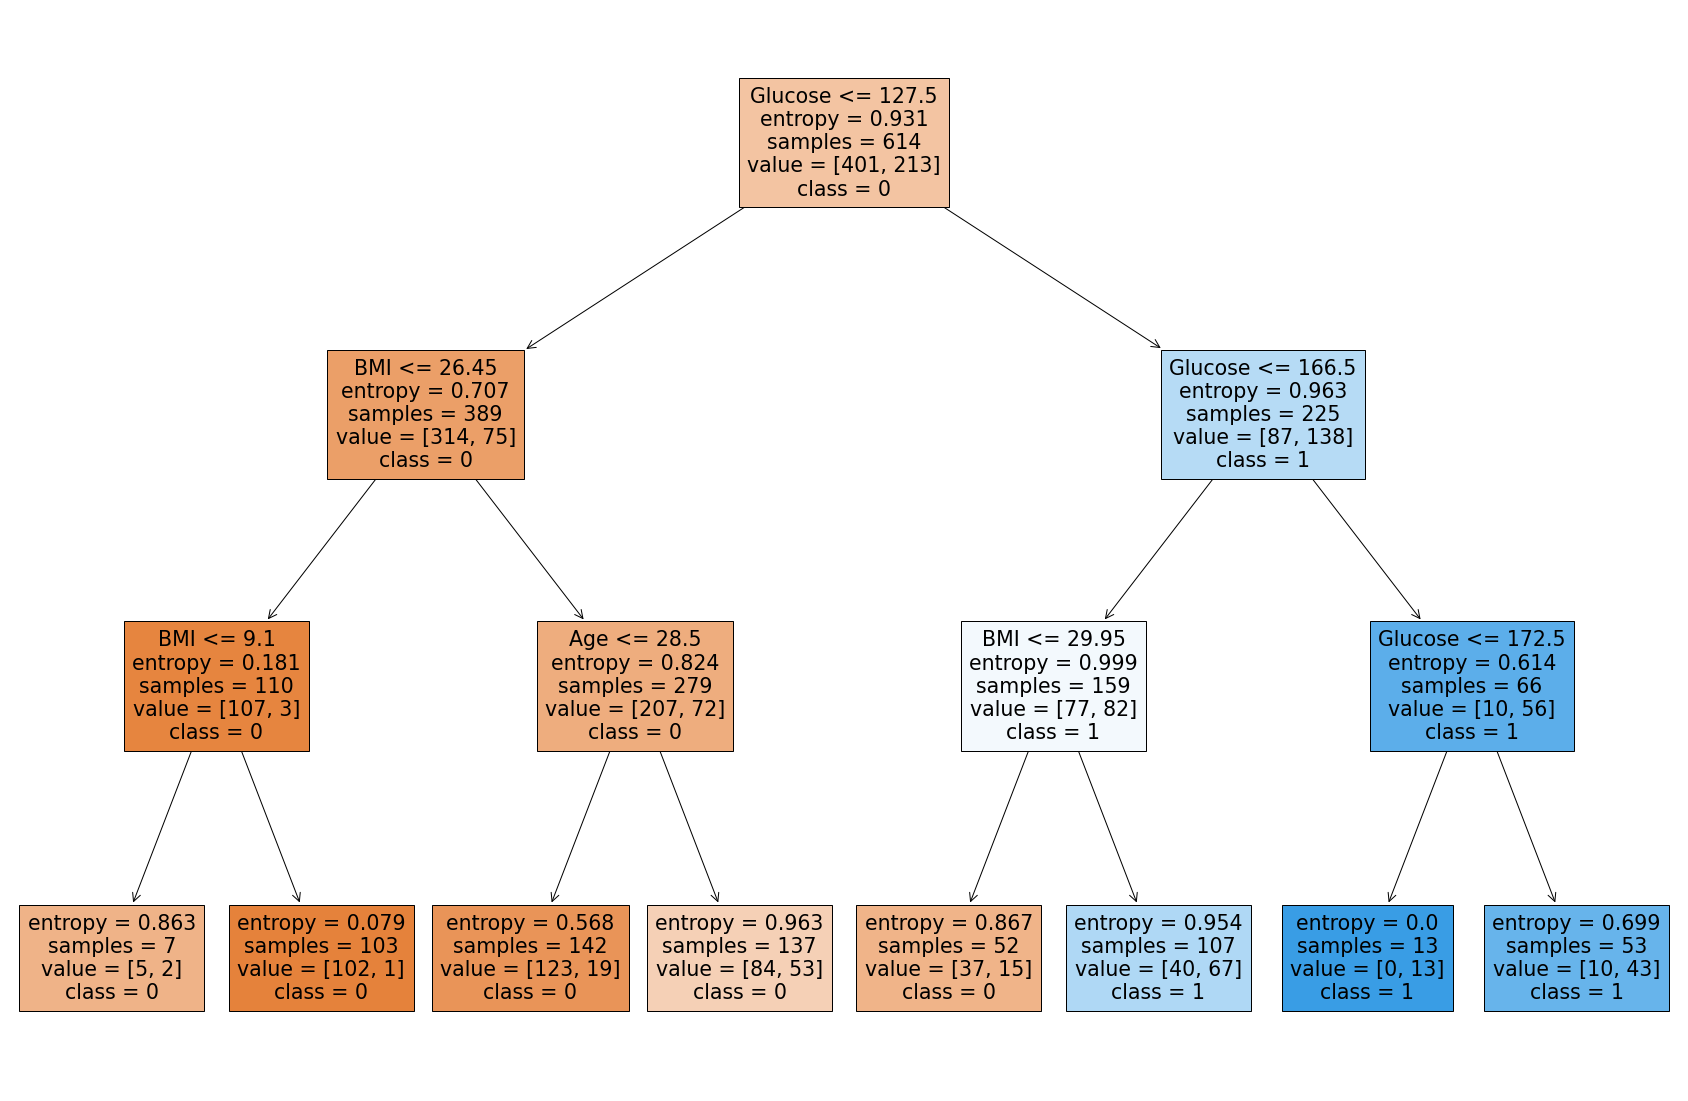

In [49]:
#printing the decision tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,20))
_ = plot_tree(model, feature_names=features,  class_names=['0','1'], filled=True)

## QUESTION 10


In [50]:
df = pd.read_csv('Avocado Dataset.csv')
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18250 non-null  object 
 1   AveragePrice  18222 non-null  object 
 2   Total Volume  18250 non-null  float64
 3   4046          18250 non-null  float64
 4   4225          18250 non-null  float64
 5   4770          18250 non-null  float64
 6   Total Bags    18250 non-null  float64
 7   Small Bags    18250 non-null  float64
 8   Large Bags    18250 non-null  float64
 9   XLarge Bags   18250 non-null  float64
 10  type          18250 non-null  object 
 11  year          18250 non-null  int64  
 12  region        18250 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


Target feature is AveragePrice, but it is of type object. We have to first convert it to float64. Furthermore, we can convert the Date feature to datetime for our convenience.

In [52]:
df['AveragePrice'] = pd.to_numeric(df['AveragePrice'],errors = 'coerce')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18250 non-null  datetime64[ns]
 1   AveragePrice  18202 non-null  float64       
 2   Total Volume  18250 non-null  float64       
 3   4046          18250 non-null  float64       
 4   4225          18250 non-null  float64       
 5   4770          18250 non-null  float64       
 6   Total Bags    18250 non-null  float64       
 7   Small Bags    18250 non-null  float64       
 8   Large Bags    18250 non-null  float64       
 9   XLarge Bags   18250 non-null  float64       
 10  type          18250 non-null  object        
 11  year          18250 non-null  int64         
 12  region        18250 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [54]:
l1 = df['AveragePrice'].isnull().sum()
l2 = df.shape[0]
print(f'Percentage of null rows in the dataset is {(l2-l1)/l2:.8f}')

Percentage of null rows in the dataset is 0.99736986


We see that less than 1 percent of the dataset has null values in rows. Thus, we can comfortably drop these rows for further analysis.

In [55]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18202 entries, 0 to 18249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18202 non-null  datetime64[ns]
 1   AveragePrice  18202 non-null  float64       
 2   Total Volume  18202 non-null  float64       
 3   4046          18202 non-null  float64       
 4   4225          18202 non-null  float64       
 5   4770          18202 non-null  float64       
 6   Total Bags    18202 non-null  float64       
 7   Small Bags    18202 non-null  float64       
 8   Large Bags    18202 non-null  float64       
 9   XLarge Bags   18202 non-null  float64       
 10  type          18202 non-null  object        
 11  year          18202 non-null  int64         
 12  region        18202 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


We see that the `Total Bags` should be equal to the sum of `Large Bags`, `Small Bags` and `XLarge Bags` for every record.

In [56]:
df.shape[0] - (df['Total Bags'] == df['Large Bags'] + df['Small Bags'] + df['XLarge Bags']).sum()

4028

There are 4036 records that do not follow this consistency. So we need to rectify these records.

In [57]:
df['Total Bags'] = df['Large Bags'] + df['Small Bags'] + df['XLarge Bags']

In [58]:
df.shape[0] - (df['Total Bags'] == df['Large Bags'] + df['Small Bags'] + df['XLarge Bags']).sum()

0

In [59]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


We will use Z-score normalization for normalizing the Large Bags, Small Bags, XLarge Bags and Total Bags. We could also normalize features such as Total Volume, 4046, 4225, 4770.


In [60]:
norm_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [61]:
for col in norm_features:
    m = df[col].mean()
    s = df[col].std()
    df[col] = (df[col]-m)/s

In [62]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,-0.227812,-0.231097,-0.199756,-0.212175,-0.234327,-0.232758,-0.222626,-0.175808,conventional,2015,Albany
1,2015-12-20,1.35,-0.230519,-0.231383,-0.207898,-0.212080,-0.233508,-0.231681,-0.222609,-0.175808,conventional,2015,Albany
2,2015-12-13,0.93,-0.212201,-0.231288,-0.154389,-0.211410,-0.234885,-0.233510,-0.222586,-0.175808,conventional,2015,Albany
3,2015-06-12,1.08,-0.223545,-0.231022,-0.185222,-0.211948,-0.237249,-0.236675,-0.222460,-0.175808,conventional,2015,Albany
4,2015-11-29,1.29,-0.231629,-0.231172,-0.208562,-0.211918,-0.236872,-0.236262,-0.222199,-0.175808,conventional,2015,Albany


## Question 11
11. Test drive the basic version of Apriori algorithms for Frequent Itemset Mining using the package / library
support in the platform of your choice. Test it with various support and confidence measures and generate a time
comparison for varied data set sizes. To do the performance comparison you may use benchmark datasets
provided for FIM such as the FIMI workshop or other sources

In [63]:
!pip3 install apyori

In [64]:
from mlxtend.frequent_patterns import apriori, association_rules
import csv

In [65]:
# Obtaining the individual transactions
l = [i.strip('\n').split(',') for i in open("store_data.csv").readlines()]

In [66]:
l

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [67]:
print(len(l))

7501


In [68]:
#One Hot Encoding
from mlxtend.preprocessing import TransactionEncoder
ohe = TransactionEncoder()
ohe_rec = ohe.fit(l).transform(l)
df = pd.DataFrame(ohe_rec, columns=ohe.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Applying apriori with various confidence and minimum supports

We see that the total number of individual transactions is 7501. If we consider a minimum support of 0.01, 0.05, and 0.08, with confidence being either 0.15, 0.2, 0.25 we get 9 combinations of min_support and confidence. Here, I have considered 3 out of those 9 possible combinations.

##### NOTE:

The minimum support is considered so small since the total number of records is 7501, and thus 0.01, 0.05 and 0.1 would correspond to a frequency of 75, 375, and 600 records, which is adequate.

The dataset supports only low confidence values, and for higher values of confidence, no association rules are formed at all.


In [69]:
import time
#Applying apriori algo with min_suport = 0.01 and confidence 0.25
start = time.process_time()
freq_items=apriori(df, min_support=0.01, use_colnames=True)
time_taken=time.process_time() - start
print(f'Time taken for mining the dataset is {time_taken}')
freq_items

Time taken for mining the dataset is 0.2891317820000001


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


In [70]:
#Forming association rules using FIS
start = time.process_time()
rules = association_rules(freq_items, metric="confidence", min_threshold=0.25)
time_taken=time.process_time() - start
print(f'Time taken for forming the association rules with the above frequent itemset is {time_taken}')
rules

Time taken for forming the association rules with the above frequent itemset is 0.008022588000001107


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844
3,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
4,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921
...,...,...,...,...,...,...,...,...,...
90,"(mineral water, milk)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597
91,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
92,"(mineral water, olive oil)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071
93,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557


In [71]:
#Applying apriori algo with min_suport = 0.05 and confidence 0.2
start = time.process_time()
freq_items=apriori(df, min_support=0.05, use_colnames=True)
time_taken=time.process_time() - start
print(f'Time taken for mining the dataset is {time_taken}')
freq_items

Time taken for mining the dataset is 0.03543586199999993


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [72]:
#Forming association rules using FIS
start = time.process_time()
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
time_taken=time.process_time() - start
print(f'Time taken for forming the association rules with the above frequent itemset is {time_taken}')
rules

Time taken for forming the association rules with the above frequent itemset is 0.006733691000000874


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


In [73]:
#Applying apriori algo with min_suport = 0.08 and confidence 0.13
start = time.process_time()
freq_items=apriori(df, min_support=0.08, use_colnames=True)
time_taken=time.process_time() - start
print(f'Time taken for mining the dataset is {time_taken}')
freq_items

Time taken for mining the dataset is 0.010052458000000541


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.163845,(chocolate)
3,0.080389,(cookies)
4,0.179709,(eggs)
5,0.170911,(french fries)
6,0.095321,(frozen vegetables)
7,0.132116,(green tea)
8,0.098254,(ground beef)
9,0.129583,(milk)


In [74]:
#Forming association rules using FIS
start = time.process_time()
rules = association_rules(freq_items, metric="confidence", min_threshold=0.13)
time_taken=time.process_time() - start
print(f'Time taken for forming the association rules with the above frequent itemset is {time_taken}')
rules

Time taken for forming the association rules with the above frequent itemset is 0.002988870999999449


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


NOTE :

We see that for the last combination of support and confidence values, no association rules have been formed. This also proves to the fact that the dataset inherently supports only low confidence values for mining.


## Question 12

In [76]:
from mlxtend.frequent_patterns import fpgrowth

In [77]:
l = [i.strip('\n').split(',') for i in open("store_data.csv").readlines()]
l

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [78]:
ohe = TransactionEncoder()
ohe_rec = ohe.fit(l).transform(l)
df = pd.DataFrame(ohe_rec, columns=ohe.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Applying fpgrowth with various confidence and minimum supports

We see that the total number of individual transactions is 7501. If we consider a minimum support of 0.01, 0.05, and 0.08, with confidence being either 0.15, 0.2, 0.25 we get 9 combinations of min_support and confidence. Here, I have considered 3 out of those 9 possible combinations.

#### NOTE:

The minimum support is considered so small since the total number of records is 7501, and thus 0.01, 0.05 and 0.1 would correspond to a frequency of 75, 375, and 600 records, which is adequate.

The dataset supports only low confidence values, and for higher values of confidence, no association rules are formed at all.


In [79]:
#Applying fpgrowth algo with min_suport = 0.01 and confidence 0.25
start = time.process_time()
freq_items=fpgrowth(df, min_support=0.01, use_colnames=True)
time_taken=time.process_time() - start
print(f'Time taken for mining the dataset is {time_taken}')
freq_items

Time taken for mining the dataset is 0.20513794100000027


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
252,0.011465,"(burgers, cake)"
253,0.014131,"(green tea, cake)"
254,0.010265,"(frozen vegetables, cake)"
255,0.011865,"(pancakes, cake)"


In [80]:
#Forming association rules using FIS
start = time.process_time()
rules = association_rules(freq_items, metric="confidence", min_threshold=0.25)
time_taken=time.process_time() - start
print(f'Time taken for forming the association rules with the above frequent itemset is {time_taken}')
rules

Time taken for forming the association rules with the above frequent itemset is 0.007909554999999457


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
1,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144
2,(shrimp),(chocolate),0.071457,0.163845,0.017998,0.251866,1.537221,0.006290,1.117654
3,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209
4,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
...,...,...,...,...,...,...,...,...,...
90,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
91,(herb & pepper),(eggs),0.049460,0.179709,0.012532,0.253369,1.409883,0.003643,1.098656
92,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543
93,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921


In [81]:
#Applying fpgrowth algo with min_suport = 0.05 and confidence 0.2
start = time.process_time()
freq_items=fpgrowth(df, min_support=0.05, use_colnames=True)
time_taken=time.process_time() - start
print(f'Time taken for mining the dataset is {time_taken}')
freq_items

Time taken for mining the dataset is 0.08007066400000085


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [82]:
#Forming association rules using FIS
start = time.process_time()
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
time_taken=time.process_time() - start
print(f'Time taken for forming the association rules with the above frequent itemset is {time_taken}')
rules

Time taken for forming the association rules with the above frequent itemset is 0.006320184999999867


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


In [83]:
#Applying fpgrowth algo with min_suport = 0.08 and confidence 0.15
start = time.process_time()
freq_items=fpgrowth(df, min_support=0.08, use_colnames=True)
time_taken=time.process_time() - start
print(f'Time taken for mining the dataset is {time_taken}')
freq_items

Time taken for mining the dataset is 0.05425885400000041


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.179709,(eggs)
3,0.087188,(burgers)
4,0.129583,(milk)
5,0.170911,(french fries)
6,0.174110,(spaghetti)
7,0.095321,(frozen vegetables)
8,0.080389,(cookies)
9,0.163845,(chocolate)


In [84]:
#Forming association rules using FIS
start = time.process_time()
rules = association_rules(freq_items, metric="confidence", min_threshold=0.15)
time_taken=time.process_time() - start
print(f'Time taken for forming the association rules with the above frequent itemset is {time_taken}')
rules

Time taken for forming the association rules with the above frequent itemset is 0.006129259999999803


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


NOTE :

We see that for the last combination of support and confidence values, no association rules have been formed. This also proves to the fact that the dataset inherently supports only low confidence values for mining.
